In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta

from  datetime import date
#import statsmodels.api as sm
import pylab 
import scipy.stats as stats
today=date.today()
import math
from scipy.stats import gaussian_kde
today=(today.strftime('%Y-%m-%d'))
#Semilla aleatoria de numpy
np.random.seed(0)

nivelsignificatividad=0.05
data = yf.download(tickers = 'TEF.MC', start = '1987-06-12',end = today)


[*********************100%***********************]  1 of 1 completed


In [79]:
res=y_predic-y_test
sumares=np.sum(res)
sumares

11.33085025090232

In [80]:
#Funcion de resumen para el rendimiento de cada red neuronal
#Se le pasa por parametro la configuracion de la red, predicción y datos reales.Devuelve un dataframe con el calculo de estadisticos y normalidad del residuo
#Se guarda ademas para cada red el numero de epochs para el que ha minimizado al perdida porque habrá que volver a usar esta parámetro para predicción
def resumen(back,numregressors,epochs,neuronashidden1,neuronashidden2,neuronashidden3,y_test,y_pred,LSTM=True):
    
    n=y_pred.shape[0]
    k=numregressors
    res=y_pred-y_test
    #res = res[~np.isnan(res)]
    sumares=np.sum(res)
    
    res2=(y_pred-y_test)**2
    sumres2=np.sum(res2,axis=0)
    #y_pred=y_predic
    
           
#Media residuo
    mediares=res.mean()
#Desv resudio
    desvres=res.std()
#RMSE
    rmse=np.sqrt((sumres2/n))
#MEA
    mae=(1/n)*np.sum(np.abs(res))
#MAPE
    mape=(100/n)*np.sum(np.abs((y_test-y_pred)/y_test))

#AKAIKE
    L=(-n/2)*(1+math.log(2*math.pi)-math.log(n))-((n/2)*math.log(sumres2))
    AIC=n*(math.log(sumres2/n))+(2*k)+(n*(1+math.log(2*math.pi)))

#Davidson and MCKInnon
    DM=L-k
#BIC(Bayesian Information Criterio)
    BIC=(-2*L)+(k*math.log(n))

#Hannan and Quinn
    HQC=(-2*L)+(2*k*math.log(math.log(n)))

#bias
    bias=(1/n)*np.sum(res)
#Jarque-Bera normalidad residuo
    pvalue=stats.jarque_bera(res)[1]
###Gráficas
  

    plt.figure(figsize=(16,8))
    plt.plot(y_test, color = 'black', label = 'Test')
    plt.plot(y_pred, color = 'green', label = 'pred')
    plt.legend()
    plt.show()
    
     
    
    plt.figure(figsize=(4,4))
    stats.probplot(res[::,0], dist="norm", plot=pylab)
    plt.figure(figsize=(4,4))
    plt.hist((y_pred-y_test))
    pylab.show()
    
    
    x = np.linspace(-4,4,num=n)

#Caso que queramos poner como limites los valores minimo y maximo respectivamente de los residuos
#x = np.linspace(int(residuos.min()),int(residuos.max()),num=n)

#Curva normal con parametros media=media de los residuos  y varianza=varianza de los residuos 
#En caso que los datos siguiesen dirtribucion normal se tendria que parecer a esta curva 
    y = stats.norm.pdf(x,res.mean(),res.std())

#Curva normal N(0,1)
    #y2=stats.norm.pdf(x,0,1)
    fig, ax = plt.subplots(figsize=(17,4))
    datosnorm=np.random.randn(n)
    densidad_normal= gaussian_kde(datosnorm)
    densidad_normal._compute_covariance()
    
    
# Si el residuo se distribuyese normalmente sería con esta forma N(mediaresiuos,desv residuos**2)
    ax.plot(x, y,"--", linewidth=2,c='r',label='Curva normal Teorica')
    ax.plot(x, densidad_normal(x),"--", linewidth=2,c='g',label='N(0,1)')
    
    
#Calculo de la funcion densidad mediante método
#result.resid.plot.kde(bw_method=0.3,label='Funcion Densidad residuos mediante kde')

#Implemantación manual de la función de densidad de los residuos
    #Se eliminan nulos e infinitos ya que a diferencia de ARIMA No se puede aplicar gaussian_kde por dar error con valores Nan
    resfiltro= res[~np.isnan(res)]
    resfiltro = res[~np.isinf(res)]
    gaussian_kde(resfiltro)
    densidadresiduos=gaussian_kde(resfiltro)
    densidadresiduos._compute_covariance()
    ax.plot(x,densidadresiduos(x),label="Residuos")

    ax.hist(x=res, density=True, bins=30, color="#3182bd", alpha=0.5,label='Histograma residuos')
          

    ax.set_title('Distribución de Errores')
    ax.set_xlabel('Error')
    ax.set_ylabel('Densidad de probabilidad')
    ax.legend();

    plt.legend()
    plt.show()

        
###Comparativa
    datoscomparativa= [{'Dias Muestra':back,'LSTM':LSTM,'Regresores':numregressors,'Epochs':epochs,'Capa Oculta1': neuronashidden1, 'Capao Oculta2': neuronashidden2, 'CapaOculta3': neuronashidden3,'Bias':bias,'Residuo':sumares,'Media Residuo':res.mean(),'Residuo **2':round(sumres2[0],10),'P-value Jarque Bera':pvalue,'RMSE':rmse[0],'MAE':mae,'MAPE':mape,'AKAIKE':AIC,'BIC':BIC,'HQC':HQC,'DM':DM}]
    dfcomparativa=pd.DataFrame(datoscomparativa)

    
    return dfcomparativa

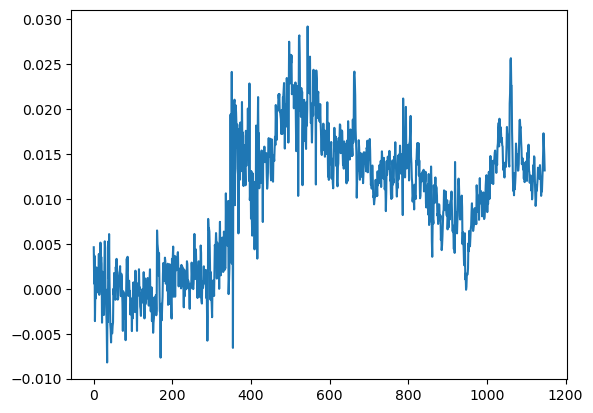

In [81]:
plt.plot(model1.predict(X_test)-y_test)

/tmp/ipykernel_4635/664177150.py:26: RuntimeWarning: divide by zero encountered in true_divide
  mape=(100/n)*np.sum(np.abs((y_test-y_pred)/y_test))


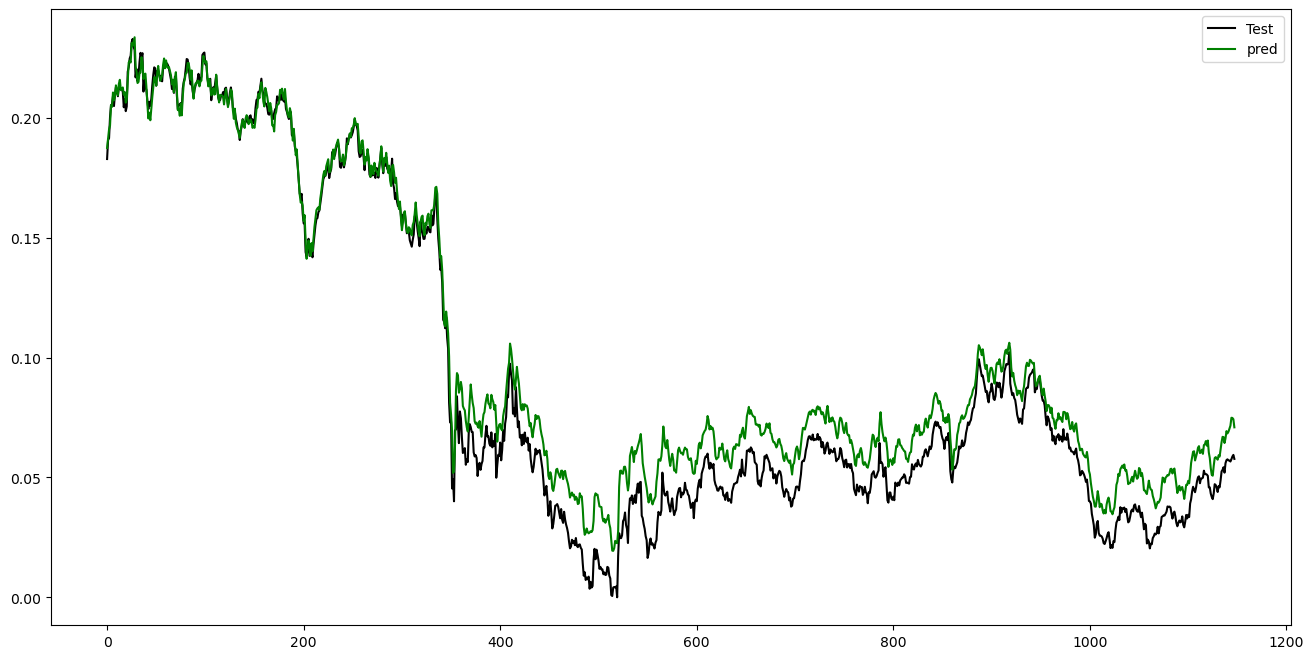

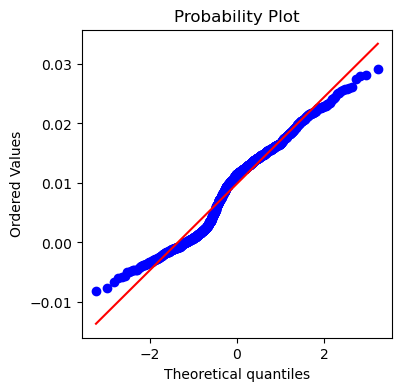

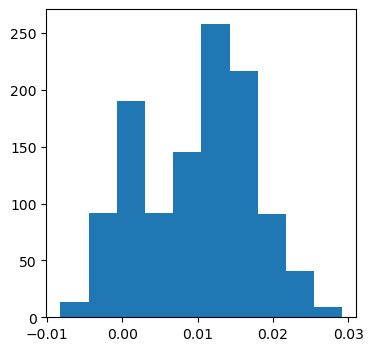

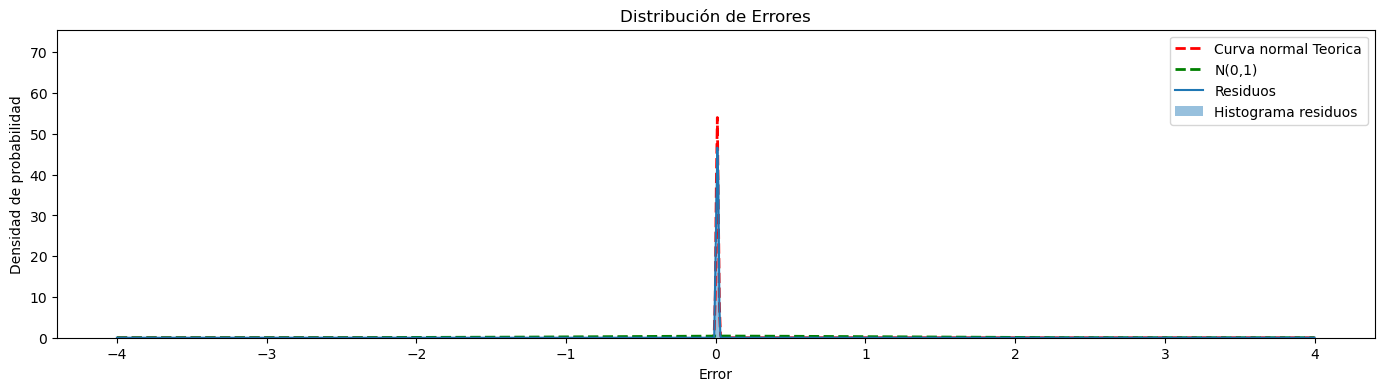

,Dias Muestra,LSTM,Regresores,Epochs,Capa Oculta1,Capao Oculta2,CapaOculta3,Bias,Residuo,Media Residuo,Residuo **2,P-value Jarque Bera,RMSE,MAE,MAPE,AKAIKE,BIC,HQC,DM
0,40,True,13,25,150,0,0,0.00987,11.33085,0.00987,0.174054,4.220562e-09,0.012313,0.010338,inf,-6811.819816,-6746.224721,-6787.056679,3405.909908


In [82]:
#y_predic=np.cumsum(np.random.randn(1148)).reshape(-1,1)
#y_predic=np.ones(1148).reshape(-1,1)
y_predic=model1.predict(X_test)
modelo1=resumen(back,numregressors,losses1.idxmin()[0],neuronashidden1,neuronashidden2,neuronashidden3,y_test,y_predic,LSTM=True,)
modelo1

In [3]:
#Se añaden índices al dataset

data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)



data['Target'] = data['Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

#Se añade rentabilidad por registro y rentabilidad acumulada
data['Rentabilidad']=((data['Adj Close'].shift(1)-data['Adj Close'])/data['Adj Close'])*100
data['RentabilidadAcum']=np.cumsum(data['Rentabilidad'])
data.reset_index(inplace = True)
data.drop(['Date','Adj Close'],axis=1, inplace=True)
data.dropna(inplace=True)
#Obtener de manera automatica el nuḿero de variables a evaluar 
#Todos los valores excepto el precio de cierre que es lo que se pretende predecir
numregressors=data.shape[1]-1

In [4]:
dataClose=data.loc[:, data.columns == 'Close']
data=data.loc[:, data.columns != 'Close']
data=pd.concat([data,dataClose],axis=1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data)


In [6]:
#Numero de dias hacia atrás  a tener en cuenta 
back=40
#Numero reuronas
#neuronas=150
#Numero de dias a predecir
ndias=7
#procentaje train
train=0.8

In [7]:

X = []
print(data_set_scaled.shape[0])
for j in range(numregressors):
    X.append([])
    for i in range(back, data_set_scaled.shape[0]):
        X[j].append(data_set_scaled[i-back:i, j])


X=np.moveaxis(X, [0], [2])


X, yi =np.array(X), np.array(data_set_scaled[back:,-1])
y=np.reshape(yi,(len(yi),1))


5779


In [8]:
# Train/Test split 
splitlimit = int(len(X)*train)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


4591
(4591, 40, 13)
(1148, 40, 13)
(4591, 1)
(1148, 1)


In [9]:
#Creacion primera red neuronal Modelo1 de una sola capa oculta
neuronashidden1=150
neuronashidden2=0
neuronashidden3=0

In [10]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,LSTM, Input, Activation, concatenate

from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import History

#Semilla aleatoria de tsnsorflow
tf.random.set_seed(0)


2023-04-22 11:50:52.638522: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [11]:
# Entrada y salida
lstm_input = Input(shape=(back, numregressors), name='lstm_input')
inputs = LSTM(neuronashidden1, name='HiddenLayer1',return_sequences=True)(lstm_input)
output=LSTM(1,activation='linear',name ='Output_Layer')(inputs)
model1 = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_input (InputLayer)      [(None, 40, 13)]          0         
_________________________________________________________________
HiddenLayer1 (LSTM)          (None, 40, 150)           98400     
_________________________________________________________________
Output_Layer (LSTM)          (None, 1)                 608       
Total params: 99,008
Trainable params: 99,008
Non-trainable params: 0
_________________________________________________________________


2023-04-22 11:50:53.301134: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-04-22 11:50:53.301752: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-04-22 11:50:53.321232: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-22 11:50:53.321396: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GT 1030 computeCapability: 6.1
coreClock: 1.468GHz coreCount: 3 deviceMemorySize: 1.95GiB deviceMemoryBandwidth: 44.76GiB/s
2023-04-22 11:50:53.321416: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-04-22 11:50:53.322403: I tensorflow/stream_executor/platform/default/dso_

In [12]:
%%time
model1.compile(optimizer=adam, loss='mse')
model1.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

2023-04-22 11:50:53.844037: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/30


2023-04-22 11:50:53.855646: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3000000000 Hz
2023-04-22 11:50:54.923038: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-04-22 11:50:55.043857: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


276/276 [==============================] - 7s 21ms/step - loss: 0.0116 - val_loss: 1.0216e-04
Epoch 2/30
276/276 [==============================] - 6s 20ms/step - loss: 2.4649e-04 - val_loss: 3.5808e-05
Epoch 3/30
276/276 [==============================] - 6s 20ms/step - loss: 1.6865e-04 - val_loss: 3.0886e-05
Epoch 4/30
276/276 [==============================] - 5s 20ms/step - loss: 1.5152e-04 - val_loss: 3.2874e-05
Epoch 5/30
276/276 [==============================] - 5s 20ms/step - loss: 1.2298e-04 - val_loss: 2.6809e-05
Epoch 6/30
276/276 [==============================] - 5s 20ms/step - loss: 1.3831e-04 - val_loss: 1.5368e-05
Epoch 7/30
276/276 [==============================] - 5s 20ms/step - loss: 1.0079e-04 - val_loss: 1.6956e-04
Epoch 8/30
276/276 [==============================] - 5s 20ms/step - loss: 1.0366e-04 - val_loss: 5.3546e-05
Epoch 9/30
276/276 [==============================] - 5s 20ms/step - loss: 6.9815e-05 - val_loss: 2.6291e-05
Epoch 10/30
276/276 [=============

In [13]:
losses1 = pd.DataFrame(model1.history.history)

/tmp/ipykernel_4635/919964363.py:26: RuntimeWarning: divide by zero encountered in true_divide
  mape=(100/n)*np.sum(np.abs((y_test-y_pred)/y_test))


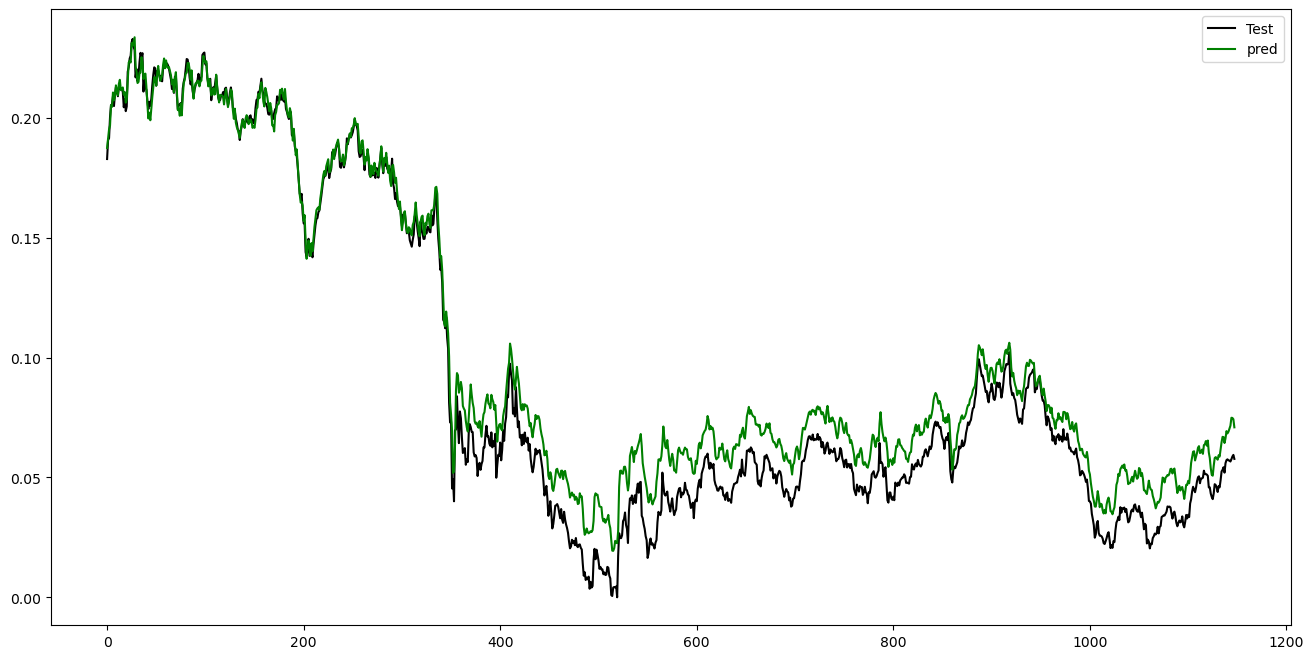

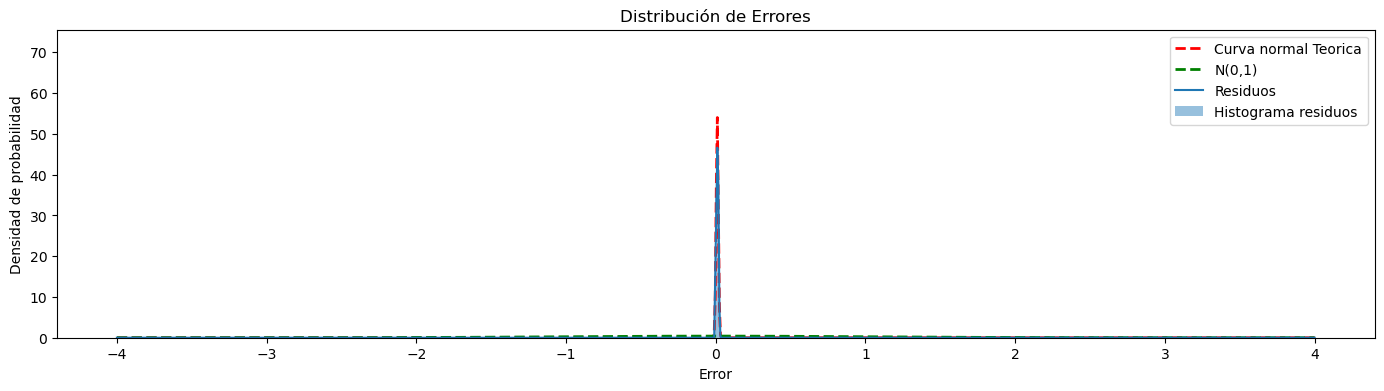

,Dias Muestra,LSTM,Regresores,Epochs,Capa Oculta1,Capao Oculta2,CapaOculta3,Bias,Residuo,Media Residuo,Residuo **2,P-value Jarque Bera,RMSE,MAE,MAPE,AKAIKE,BIC,HQC,DM
0,40,True,13,25,150,0,0,0.00987,11.33085,0.00987,0.174054,4.220562e-09,0.012313,0.010338,inf,-6811.819816,-6746.224721,-6787.056679,3405.909908


In [14]:
y_predic=model1.predict(X_test)
modelo1=resumen(back,numregressors,losses1.idxmin()[0],neuronashidden1,neuronashidden2,neuronashidden3,y_test,y_predic,LSTM=True,)
modelo1

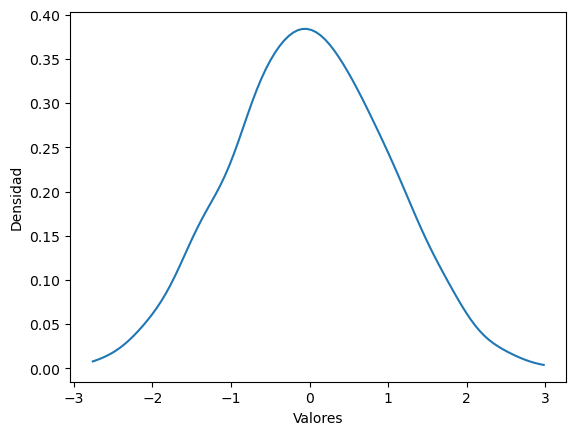

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generar datos aleatorios a partir de una distribución normal
mean = 0
std_dev = 1
data = np.random.normal(mean, std_dev, 1000)

# Calcular la función de densidad de los datos
density_func = gaussian_kde(data)

# Crear un array de valores x para graficar la función de densidad
x = np.linspace(min(data), max(data), 100)

# Graficar la función de densidad de los datos
plt.plot(x, density_func(x))

# Agregar etiquetas al gráfico
plt.xlabel('Valores')
plt.ylabel('Densidad')

# Mostrar el gráfico
plt.show()


In [80]:
#Funcion de resumen para el rendimiento de cada red neuronal
#Se le pasa por parametro la configuracion de la red, predicción y datos reales.Devuelve un dataframe con el calculo de estadisticos y normalidad del residuo
#Se guarda ademas para cada red el numero de epochs para el que ha minimizado al perdida porque habrá que volver a usar esta parámetro para predicción
def resumen(back,numregressors,epochs,neuronashidden1,neuronashidden2,neuronashidden3,y_test,y_pred,LSTM=True):
    
    n=y_pred.shape[0]
    k=numregressors
    res=y_pred-y_test
    #res = res[~np.isnan(res)]
    sumares=np.sum(res)
    
    res2=(y_pred-y_test)**2
    sumres2=np.sum(res2,axis=0)
    #y_pred=y_predic
    
           
#Media residuo
    mediares=res.mean()
#Desv resudio
    desvres=res.std()
#RMSE
    rmse=np.sqrt((sumres2/n))
#MEA
    mae=(1/n)*np.sum(np.abs(res))
#MAPE
    mape=(100/n)*np.sum(np.abs((y_test-y_pred)/y_test))

#AKAIKE
    L=(-n/2)*(1+math.log(2*math.pi)-math.log(n))-((n/2)*math.log(sumres2))
    AIC=n*(math.log(sumres2/n))+(2*k)+(n*(1+math.log(2*math.pi)))

#Davidson and MCKInnon
    DM=L-k
#BIC(Bayesian Information Criterio)
    BIC=(-2*L)+(k*math.log(n))

#Hannan and Quinn
    HQC=(-2*L)+(2*k*math.log(math.log(n)))

#bias
    bias=(1/n)*np.sum(res)
#Jarque-Bera normalidad residuo
    pvalue=stats.jarque_bera(res)[1]
###Gráficas
  

    plt.figure(figsize=(16,8))
    plt.plot(y_test, color = 'black', label = 'Test')
    plt.plot(y_pred, color = 'green', label = 'pred')
    plt.legend()
    plt.show()
    
     
    
    plt.figure(figsize=(4,4))
    stats.probplot(res[::,0], dist="norm", plot=pylab)
    plt.figure(figsize=(4,4))
    plt.hist((y_pred-y_test))
    pylab.show()
    
    
    x = np.linspace(-4,4,num=n)

#Caso que queramos poner como limites los valores minimo y maximo respectivamente de los residuos
#x = np.linspace(int(residuos.min()),int(residuos.max()),num=n)

#Curva normal con parametros media=media de los residuos  y varianza=varianza de los residuos 
#En caso que los datos siguiesen dirtribucion normal se tendria que parecer a esta curva 
    y = stats.norm.pdf(x,res.mean(),res.std())

#Curva normal N(0,1)
    #y2=stats.norm.pdf(x,0,1)
    fig, ax = plt.subplots(figsize=(17,4))
    datosnorm=np.random.randn(n)
    densidad_normal= gaussian_kde(datosnorm)
    densidad_normal._compute_covariance()
    
    
# Si el residuo se distribuyese normalmente sería con esta forma N(mediaresiuos,desv residuos**2)
    ax.plot(x, y,"--", linewidth=2,c='r',label='Curva normal Teorica')
    ax.plot(x, densidad_normal(x),"--", linewidth=2,c='g',label='N(0,1)')
    
    
#Calculo de la funcion densidad mediante método
#result.resid.plot.kde(bw_method=0.3,label='Funcion Densidad residuos mediante kde')

#Implemantación manual de la función de densidad de los residuos
    #Se eliminan nulos e infinitos ya que a diferencia de ARIMA No se puede aplicar gaussian_kde por dar error con valores Nan
    #resfiltro= res[~np.isnan(res)]
    resfiltro = res[~np.isinf(res)]
    gaussian_kde(resfiltro)
    densidadresiduos=gaussian_kde(resfiltro)
    densidadresiduos._compute_covariance()
    ax.plot(x,densidadresiduos(x),label="Residuos")

    ax.hist(x=res, density=True, bins=30, color="#3182bd", alpha=0.5,label='Histograma residuos')
          

    ax.set_title('Distribución de Errores')
    ax.set_xlabel('Error')
    ax.set_ylabel('Densidad de probabilidad')
    ax.legend();

    plt.legend()
    plt.show()

        
###Comparativa
    datoscomparativa= [{'Dias Muestra':back,'LSTM':LSTM,'Regresores':numregressors,'Epochs':epochs,'Capa Oculta1': neuronashidden1, 'Capao Oculta2': neuronashidden2, 'CapaOculta3': neuronashidden3,'Bias':bias,'Residuo':sumares,'Media Residuo':res.mean(),'Residuo **2':round(sumres2[0],10),'P-value Jarque Bera':pvalue,'RMSE':rmse[0],'MAE':mae,'MAPE':mape,'AKAIKE':AIC,'BIC':BIC,'HQC':HQC,'DM':DM}]
    dfcomparativa=pd.DataFrame(datoscomparativa)

    
    return dfcomparativa

In [17]:
n=1000

y_test=np.random.normal(10,2,n)
y_pred=np.random.normal(10,2,n)
res=y_test-y_pred

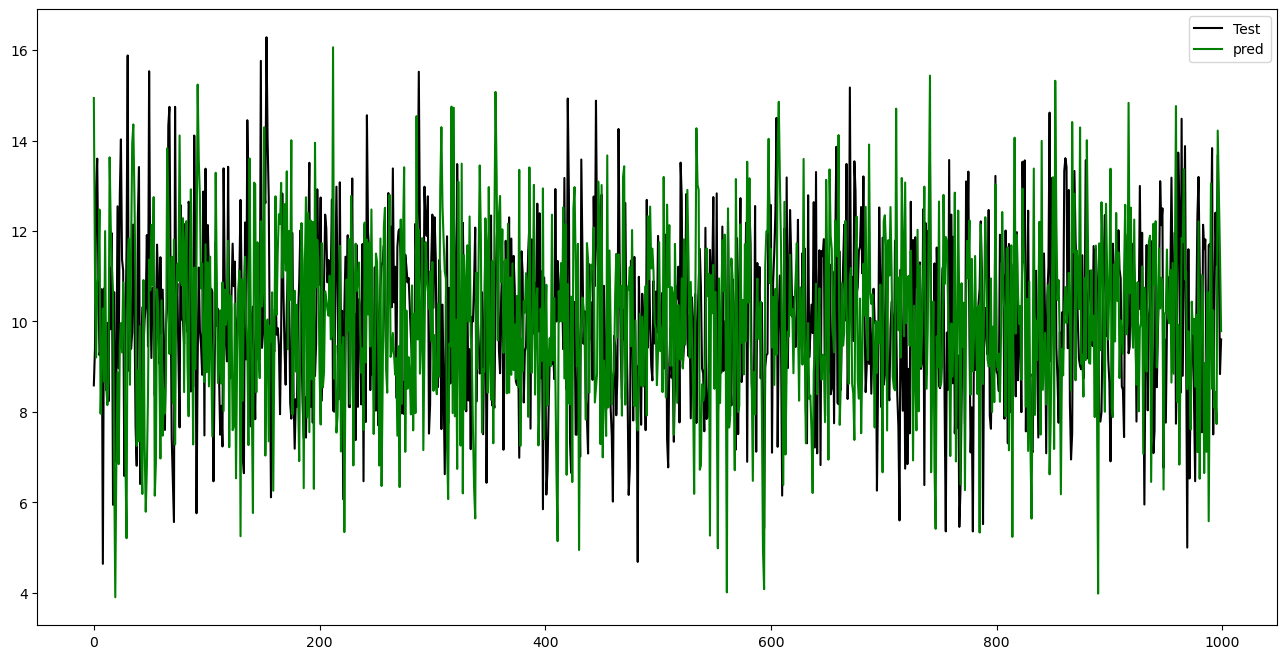

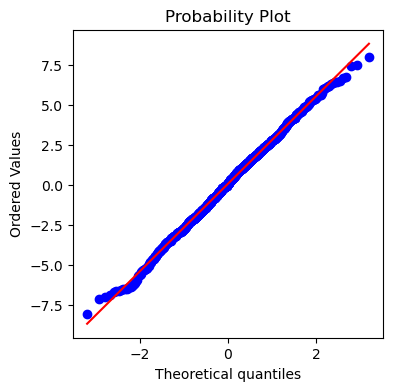

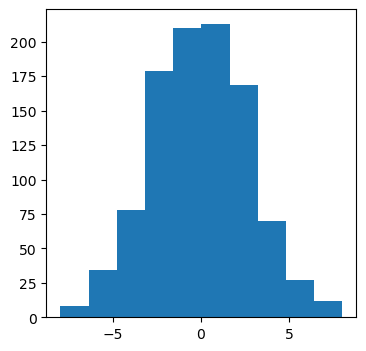

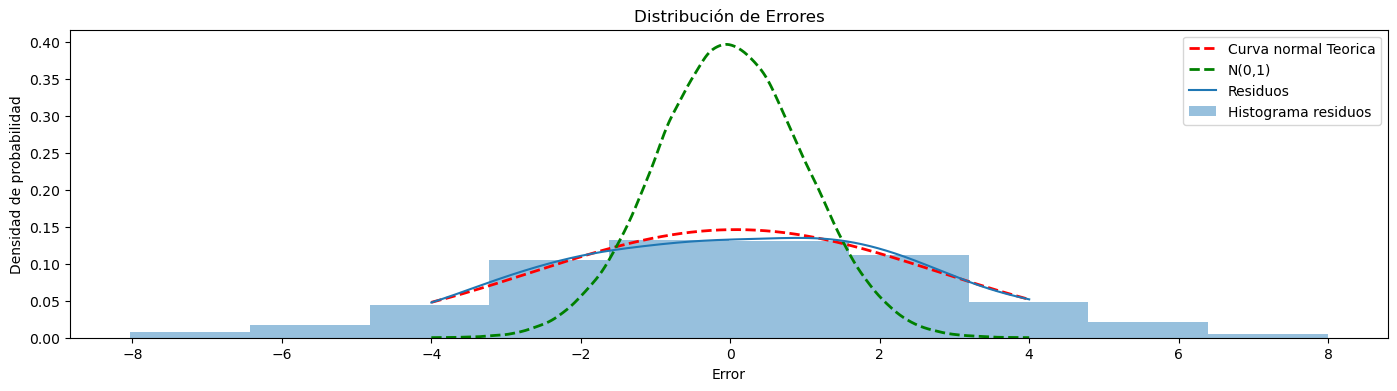

In [23]:
###Gráficas
  

plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()
    
     
    
plt.figure(figsize=(4,4))
#stats.probplot(res[::,0], dist="norm", plot=pylab)
stats.probplot(res, dist="norm", plot=pylab)
plt.figure(figsize=(4,4))
plt.hist((y_pred-y_test))
pylab.show()
    
    
x = np.linspace(-4,4,num=n)

#Caso que queramos poner como limites los valores minimo y maximo respectivamente de los residuos
#x = np.linspace(int(residuos.min()),int(residuos.max()),num=n)

#Curva normal con parametros media=media de los residuos  y varianza=varianza de los residuos 
#En caso que los datos siguiesen dirtribucion normal se tendria que parecer a esta curva 
y = stats.norm.pdf(x,res.mean(),res.std())

#Curva normal N(0,1)
    #y2=stats.norm.pdf(x,0,1)
fig, ax = plt.subplots(figsize=(17,4))
datosnorm=np.random.randn(100*n)
densidad_normal= gaussian_kde(datosnorm)
#densidad_normal._compute_covariance()
    
    
# Si el residuo se distribuyese normalmente sería con esta forma N(mediaresiuos,desv residuos**2)
ax.plot(x, y,"--", linewidth=2,c='r',label='Curva normal Teorica')
ax.plot(x, densidad_normal(x),"--", linewidth=2,c='g',label='N(0,1)')
    
    
#Calculo de la funcion densidad mediante método
#result.resid.plot.kde(bw_method=0.3,label='Funcion Densidad residuos mediante kde')

#Implemantación manual de la función de densidad de los residuos
    #Se eliminan nulos e infinitos ya que a diferencia de ARIMA No se puede aplicar gaussian_kde por dar error con valores Nan
    #resfiltro= res[~np.isnan(res)]
resfiltro = res[~np.isinf(res)]
gaussian_kde(resfiltro)
densidadresiduos=gaussian_kde(resfiltro)
densidadresiduos._compute_covariance()
ax.plot(x,densidadresiduos(x),label="Residuos")

ax.hist(x=res, density=True, bins=10, color="#3182bd", alpha=0.5,label='Histograma residuos')
          

ax.set_title('Distribución de Errores')
ax.set_xlabel('Error')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

plt.legend()
plt.show()


In [21]:
stats.jarque_bera(res)[1]

0.3619100183330848